In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape((-1,1))
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

def polynomialFeaturesRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [4]:
from sklearn.metrics import mean_squared_error

poly100_reg = polynomialFeaturesRegression(100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y,y100_predict)

0.6815407621530418

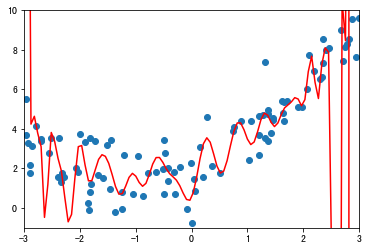

In [5]:
X_plot = np.linspace(-3,3,100).reshape(100,-1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

## train test split 的意义

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.2199965269396573

In [8]:
poly2_reg = polynomialFeaturesRegression(2)
poly2_reg.fit(X_train,y_train)

y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.8035641056297902

In [9]:
poly10_reg = polynomialFeaturesRegression(10)
poly10_reg.fit(X_train,y_train)

y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)

0.9212930722150695

In [10]:
poly100_reg = polynomialFeaturesRegression(100)
poly100_reg.fit(X_train,y_train)

y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)

13123135111.531496